# Fashion MNIST

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

## Labels
Each training and test example is assigned to one of the following labels:

Label	Description
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

## Why Numbers as a Label?
*   Computers do better with Numbers
*   We are not biased towards any one language.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

data = tf.keras.datasets.fashion_mnist

(train_imgs, train_labels), (test_imgs, test_labels) = data.load_data()

Training Label:
2
Training Pixel Array:
[[  0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  27 134 210 148  44  14   0   0  30 112 211 149  17   0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   0 157 195 194 184 201 209 198 207 204 198 207 185 193 195 101   0   0   0   0   0   0   0]
 [  0   0   0   0   0  73 202 178 179 180 177 172 176 192 184 173 173 179 182 183 204  55   0   1   0   0   0   0]
 [  0   0   0   0   0 152 192 180 189 183 185 186 182 174 178 181 182 185 193 187 196 177   0   0   0   0   0   0]
 [  0   0   0   0   0 188 195 183 191 187 176 182 178 185 181 176 182 185 195 192 194 185   0   0   0   0   0   0]
 [  0   0   0   0   0 208 196 186 186 185 179 178 184 184 185 175 176 184 193 193 193 208  37   0   0   0   0   0]
 [  0   0   0   0   0 200 199 196 181 188 179 183 193 190 190 186 184 189 197 199 196 214  65   0   0   0   0   0]
 [  0   0   0   0   0 220 200 203 225 19

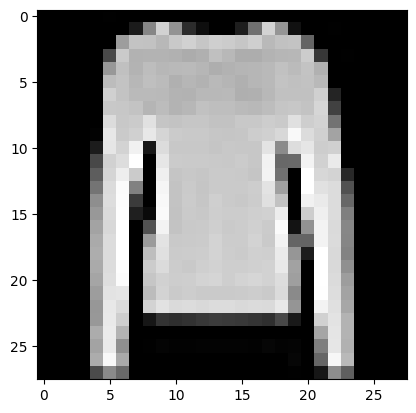

In [2]:
# index of image - between 0 to 60,000
index = 5050

np.set_printoptions(linewidth=320)

print(f"Training Label:\n{train_labels[index]}")
print(f"Training Pixel Array:\n{train_imgs[index]}")

plt.imshow(train_imgs[index], cmap='gray')
plt.show()

**Note**


*   Image has pixel value 0-255 but neural networks work better with Normalizes data.
*   Flatten takes that “square” value (a 2D array) and turns it into a line (a 1D array)

In [3]:
# Normalizing the image
train_imgs, test_imgs = train_imgs/255.0, test_imgs/255.0

#Model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Fit
history = model.fit(train_imgs, train_labels, epochs=20, validation_split=0.1)

Epoch 1/20
1688/1688 [==============================] - 13s 6ms/step - loss: 0.4956 - accuracy: 0.8259 - val_loss: 0.4048 - val_accuracy: 0.8503
Epoch 2/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3706 - accuracy: 0.8671 - val_loss: 0.3640 - val_accuracy: 0.8685
Epoch 3/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3312 - accuracy: 0.8791 - val_loss: 0.3337 - val_accuracy: 0.8777
Epoch 4/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3097 - accuracy: 0.8864 - val_loss: 0.3321 - val_accuracy: 0.8773
Epoch 5/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2894 - accuracy: 0.8931 - val_loss: 0.3458 - val_accuracy: 0.8767
Epoch 6/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2724 - accuracy: 0.9000 - val_loss: 0.3201 - val_accuracy: 0.8862
Epoch 7/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2614 - accuracy: 0.9037 - val_loss: 0.3273 - val_accuracy

[]

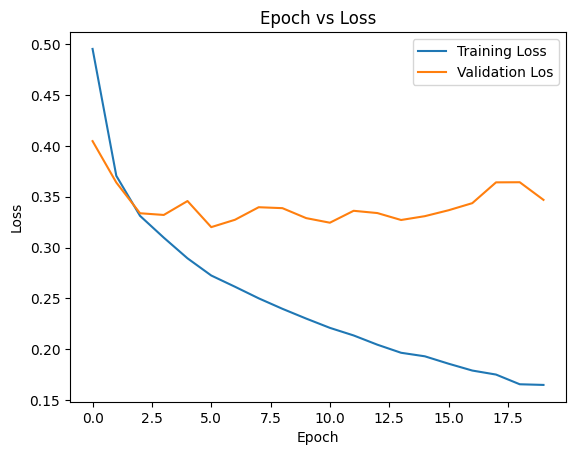

In [6]:
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label = 'Validation Los')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Epoch vs Loss")
plt.legend()
plt.plot()

[]

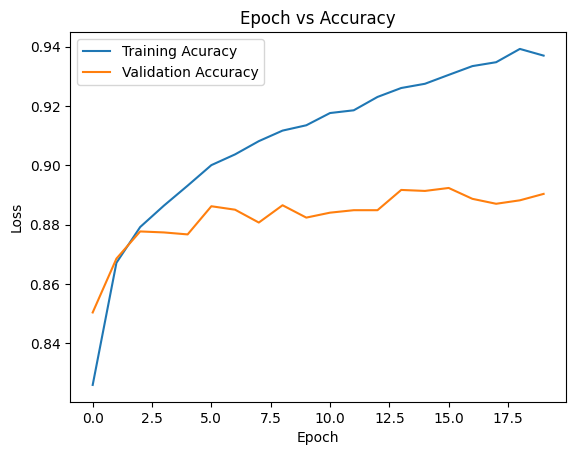

In [7]:
plt.plot(history.history['accuracy'], label="Training Acuracy")
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Epoch vs Accuracy")
plt.legend()
plt.plot()

In [8]:
model.evaluate(test_imgs, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3662 - accuracy: 0.8905


[0.3662162721157074, 0.890500009059906]

**Note**
*   if training epochs increase ==> training accuracy increase
*   Also if testing acuracy has not much impact on it ==> Model Overfitting.